In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

nltk.download('wordnet')  
nltk.download('stopwords')

stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package wordnet to /Users/yben409/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/yben409/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
lemmatizer = WordNetLemmatizer()

def remove_stop_words(text):
    clean_text = ' '.join([word for word in text.split() if word.lower() not in stop_words])
    return clean_text

def tokenize_text(text):
    return nltk.word_tokenize(text)

def lemmatize_sentence(tokens):
    lemmatized_tokens = [lemmatizer.lemmatize(token) for token in tokens]
    lemmatized_sentence = ' '.join(lemmatized_tokens)
    return lemmatized_sentence

In [10]:
encoding = 'latin1'

dataset = pd.read_csv('anxiety_data.csv', sep=',', encoding=encoding)
dataset

,0,1467810369,Mon Apr 06 22:19:45 PDT 2009,NO_QUERY,_TheSpecialOne_,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,1467810672,Mon Apr 06 22:19:49 PDT 2009,NO_QUERY,scotthamilton,is upset that he can't update his Facebook by ...
1,0,1467810917,Mon Apr 06 22:19:53 PDT 2009,NO_QUERY,mattycus,@Kenichan I dived many times for the ball. Man...
2,0,1467811184,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,ElleCTF,my whole body feels itchy and like its on fire
3,0,1467811193,Mon Apr 06 22:19:57 PDT 2009,NO_QUERY,Karoli,"@nationwideclass no, it's not behaving at all...."
4,0,1467811372,Mon Apr 06 22:20:00 PDT 2009,NO_QUERY,joy_wolf,@Kwesidei not the whole crew
...,...,...,...,...,...,...
1599994,4,2193601966,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,AmandaMarie1028,Just woke up. Having no school is the best fee...
1599995,4,2193601969,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,TheWDBoards,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,2193601991,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,bpbabe,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,2193602064,Tue Jun 16 08:40:49 PDT 2009,NO_QUERY,tinydiamondz,Happy 38th Birthday to my boo of alll time!!! ...


In [11]:
data = pd.DataFrame(dataset.iloc[:, [0,5]])
data

,0,"@switchfoot http://twitpic.com/2y1zl - Awww, that's a bummer. You shoulda got David Carr of Third Day to do it. ;D"
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


In [12]:
data.columns = ['is_anxious','tweets']
data

,is_anxious,tweets
0,0,is upset that he can't update his Facebook by ...
1,0,@Kenichan I dived many times for the ball. Man...
2,0,my whole body feels itchy and like its on fire
3,0,"@nationwideclass no, it's not behaving at all...."
4,0,@Kwesidei not the whole crew
...,...,...
1599994,4,Just woke up. Having no school is the best fee...
1599995,4,TheWDB.com - Very cool to hear old Walt interv...
1599996,4,Are you ready for your MoJo Makeover? Ask me f...
1599997,4,Happy 38th Birthday to my boo of alll time!!! ...


/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


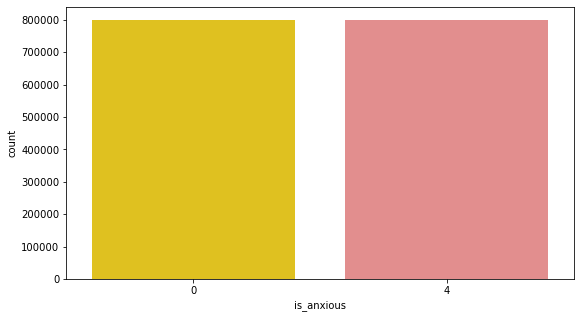

In [13]:
classes_num = data['is_anxious'].value_counts()

# Define a custom color palette
custom_palette = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=data, x='is_anxious', palette=custom_palette)

plt.show()

In [14]:
data['is_anxious'].value_counts()

is_anxious
4    800000
0    799999
Name: count, dtype: int64

In [15]:
#Perfect distribution

In [8]:
data['tweets'] = data['tweets'].str.lower()
data['tweets']

0          is upset that he can't update his facebook by ...
1          @kenichan i dived many times for the ball. man...
2            my whole body feels itchy and like its on fire 
3          @nationwideclass no, it's not behaving at all....
4                              @kwesidei not the whole crew 
                                 ...                        
1599994    just woke up. having no school is the best fee...
1599995    thewdb.com - very cool to hear old walt interv...
1599996    are you ready for your mojo makeover? ask me f...
1599997    happy 38th birthday to my boo of alll time!!! ...
1599998    happy #charitytuesday @thenspcc @sparkscharity...
Name: tweets, Length: 1599999, dtype: object

In [16]:
data['tweets'] = data['tweets'].str.replace(r'[^\w\s]+', '',regex=True)
data['tweets'] = data['tweets'].apply(remove_stop_words)
data['tweets'] = data['tweets'].map(tokenize_text)
data['tweets'] = data['tweets'].map(lemmatize_sentence)

KeyboardInterrupt: 

In [21]:
data['tweets']

0          upset cant update facebook texting might cry r...
1          kenichan dived many time ball managed save 50 ...
2                            whole body feel itchy like fire
3                   nationwideclass behaving im mad cant see
4                                        kwesidei whole crew
                                 ...                        
1599994                        woke school best feeling ever
1599995    thewdbcom cool hear old walt interview â httpb...
1599996                       ready mojo makeover ask detail
1599997    happy 38th birthday boo alll time tupac amaru ...
1599998    happy charitytuesday thenspcc sparkscharity sp...
Name: tweets, Length: 1599999, dtype: object

In [22]:
data.to_csv('Clean Dataset.csv', index=False)

In [2]:
dataset = pd.read_csv('Clean Dataset.csv')
dataset

,is_anxious,tweets
0,0,upset cant update facebook texting might cry r...
1,0,kenichan dived many time ball managed save 50 ...
2,0,whole body feel itchy like fire
3,0,nationwideclass behaving im mad cant see
4,0,kwesidei whole crew
...,...,...
1599994,4,woke school best feeling ever
1599995,4,thewdbcom cool hear old walt interview â httpb...
1599996,4,ready mojo makeover ask detail
1599997,4,happy 38th birthday boo alll time tupac amaru ...


In [20]:
import pandas as pd
import random
import csv

# Load your dataset as a Pandas DataFrame
dataset = pd.read_csv('Clean Dataset.csv')  # Replace 'your_dataset.csv' with your dataset file path

# Shuffle the dataset
shuffled_dataset = dataset.sample(frac=1, random_state=42)  # Shuffling with a random seed for reproducibility

# Define the class labels you have in your dataset
class_labels = [0, 4]

# Initialize counters for each class in each split
class_counts = [0] * 6

# Create a directory to save the splits (if it doesn't exist)
if not os.path.exists('splits'):
    os.makedirs('splits')

for _, row in shuffled_dataset.iterrows():
    class_label = row['is_anxious']  # Replace 'is_anxious' with the actual column name
    split_idx = None

    for i in range(6):
        if class_counts[i] < 133335:
            split_idx = i
            break

    if split_idx is not None:
        splits[split_idx].append(row)
        class_idx = class_labels.index(class_label)
        class_counts[split_idx] += 1

        # Export the data in batches
        if class_counts[split_idx] % batch_size == 0:
            split_file = f'splits/split_{split_idx}.csv'
            df = pd.DataFrame(splits[split_idx])
            df.to_csv(split_file, mode='a', header=not os.path.exists(split_file), index=False)
            splits[split_idx] = []

# Export any remaining data
for i, split in enumerate(splits):
    if len(split) > 0:
        split_file = f'splits/split_{i}.csv'
        df = pd.DataFrame(split)
        df.to_csv(split_file, mode='a', header=not os.path.exists(split_file), index=False)

In [26]:
split_1 = pd.read_csv('splits/split_0.csv')
split_1

,is_anxious,tweets
0,0,justcallmemac sorry experience noisy neighbour...
1,4,bonniegrove minidachshunds sweet loyal funny p...
2,0,almost reaching flickr normal account storage ...
3,0,making pot coffee amp relaxing philsflyers aft...
4,4,want watch gt httptinyurlcomicarlyigotojapan l...
...,...,...
133665,4,aphturburn tansyrue cosplays samus jigglyparts...
133666,0,stupid fridge fked today day epic fail
133667,4,ani sunday day friend twittering day thought s...
133668,4,melkirk sorry tummy ache stomach issue day yes...


/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/yben409/opt/anaconda3/lib/python3.9/site-packages/seaborn/_core.py:1225: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


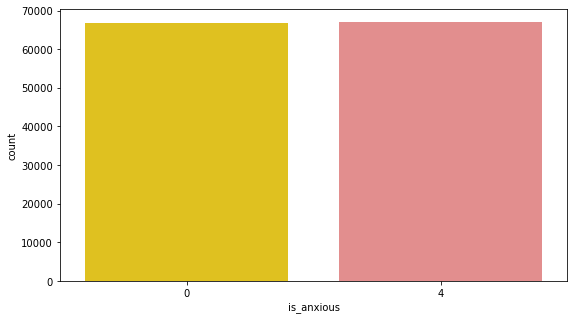

In [27]:
classes_num = split_1['is_anxious'].value_counts()

# Define a custom color palette
custom_palette = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

plt.figure(figsize=(20, 5))

plt.subplot(1, 2, 1)
sns.countplot(data=split_1, x='is_anxious', palette=custom_palette)

plt.show()